In [1]:
# README

# for data from 기상자료개방포털 종관기상관측 시간(hourly) 자료 / https://data.kma.go.kr/cmmn/main.do
# needs all variables
# appropriate data for 1~4 days / shorter, longer data would get strange plot
# red line: temperature [deg C]
# violet line: sea level pressure [hPa]
# green line: wind speed [m/s]
# yellow dots: wind direction
# blue line: relative humidity [%]
# skyblue fill: 1 hour-accumulated precipitation [mm]

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime

In [2]:
def line_yset(time,ax,var,clr):
    var_line, = ax.plot(time,var,color=clr)
    var_top = int(var.max()+10.-np.mod(var.max(),10)); var_bot = int(var.min()-np.mod(var.min(),10))
    ax.set_ylim(top=var_top,bottom=var_bot)
    ax.set_yticks(np.linspace(var_bot,var_top,11))
    ax.tick_params(axis='y',colors=var_line.get_color())
    return

In [3]:
def time2xticks(time):
    n = len(time)
    if n < 24:
        dttm = []; qd_indx = []; qd = []
        for i in range(n):
            y=int(time[i][0:4]); m=int(time[i][5:7]); d=int(time[i][8:10])
            h =int(time[i][11:13])
            dttm.append(datetime.datetime(year=y,month=m,day=d,hour=h))
            if (h == 0) | (h == 6) | (h == 12) | (h==18):
                qd_indx.append(i); qd.append(time[i][11:13]+':00')
        x = np.arange(0,n,1); dttm = np.array(dttm)
        x_ticks = x[qd_indx]
        x_ticklabels = qd
        strt_time = dttm[qd_indx[0]]
        return x, x_ticks, x_ticklabels, strt_time

    else:
        dttm = []; qd_indx = []; qd = []; md_indx = []
        for i in range(n):
            y=int(time[i][0:4]); m=int(time[i][5:7]); d=int(time[i][8:10]); h =int(time[i][11:13])
            dttm.append(datetime.datetime(year=y,month=m,day=d,hour=h))
            if (h == 0) | (h==12):
                qd_indx.append(i); qd.append(time[i][11:13]+':00')
            if h == 0:
                md_indx.append(i)
        x = np.arange(0,n,1); dttm = np.array(dttm)
        x_ticks = x[qd_indx]
        x_ticklabels = qd
        strt_time = dttm[qd_indx[0]]
        return x, x_ticks, x_ticklabels, strt_time

In [4]:
def plot_asos(time,P,T ,WS, WD, RH,R):
    # P (sea level pressure [hPa]), T (2m temperature [deg C]). WS (wind speed [m/s]), WD (wind direction [deg]), 
    # RH (relative humidity [%]), R (1hr accumulated precipitation [mm])
    # if nothing is plotted, the whole data is missing.
    fig, ax = plt.subplots(figsize=(12,5))
    
    time, x_ticks, x_ticklabels, st = time2xticks(time)
    ax.set_xlim(right=time[-1],left=time[0])
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticklabels)
    ax.set_xlabel('time [LST]')    
    ax.set_title(str(st)[:11],fontsize=14,loc='left')
    
    
    # temperature
    if not np.isnan(T).all():
        
        line_yset(time,ax,T,clr='r')

        ax.yaxis.set_label_position('left')
        ax.yaxis.tick_left()

    # pressure    
    if not np.isnan(P).all():
        ax_p = ax.twinx()
        line_yset(time,ax_p,P,clr='m')
        ax_p.yaxis.tick_right()
        ax_p.yaxis.set_label_position('right')

     
    # wind speed
    if not np.isnan(WS).all():
        ax_ws = ax.twinx()
        ax_ws.spines['left'].set_position(('axes',-0.05))
        ax_ws.spines['left'].set_color('g')
        ws_line, = ax_ws.plot(time,WS,color='g')
        if WS.max() < 20.:
            ws_top = 20; ws_int = 2
        elif WS.max() < 40.:
            ws_top = 40; ws_int = 4
        else:
            ws_top = 80; ws_int = 8
        ax_ws.set_yticks(np.arange(0,ws_top+0.1,ws_int))
        ax_ws.set_ylim(top=ws_top,bottom=0)
        ax_ws.tick_params(axis='y',color='g')
        
        ax_ws.yaxis.set_label_position('left')
        ax_ws.yaxis.tick_left()
        ax_ws.tick_params(axis='y',colors=ws_line.get_color())
        #plt.setp(ax_ws.get_yticklabels(),color='g')
        
    plt.grid()
    
    # wind direction
    if not np.isnan(WD).all():
        ax_wd = ax.twinx()
        ax_wd.spines['left'].set_position(('axes',-0.1))
        ax_wd.spines['left'].set_color('y')
        wd_scatt = ax_wd.scatter(time,WD,color='y',marker='.')
        ax_wd.set_yticks(np.linspace(0,360,5))
        ax_wd.set_ylim(top=360,bottom=0)
        ax_wd.set_yticklabels(['N','E','S','W','N'])
        ax_wd.tick_params(axis='y',color='y')
        ax_wd.yaxis.set_label_position('left')
        ax_wd.yaxis.tick_left()
        ax_wd.tick_params(axis='y',colors='y')
    
    # relative humidity
    if not np.isnan(RH).all():
        ax_rh = ax.twinx()
        ax_rh.spines['right'].set_position(('axes',1.06))
        ax_rh.spines['right'].set_color('b')
        line_yset(time,ax_rh,RH,clr='b')
        ax_rh.set_ylim(top=100,bottom=0)
        ax_rh.set_yticks(np.linspace(0,100,11))
        ax_rh.yaxis.set_label_position('right')
        ax_rh.yaxis.tick_right()
        
    # precipitation
    if not np.isnan(R).all():
        ax_prcp = ax.twinx()
        ax_prcp.spines['left'].set_position(('axes',-0.14))
        ax_prcp.spines['left'].set_color('c')
        prcp_line, = ax_prcp.plot(time,R,color='c')
        ax_prcp.fill_between(time,R,0,color='c')
        if R.max() < 40.:
            r_top = 40
        elif R.max() < 80:
            r_top = 80
        else:
            r_top = 160
        ax_prcp.set_yticks(np.linspace(0,r_top,11))
        ax_prcp.set_ylim(top=r_top,bottom=0)
        ax_prcp.yaxis.set_label_position('left')
        ax_prcp.yaxis.tick_left()
        ax_prcp.tick_params(axis='y',colors=prcp_line.get_color())
    

    plt.tight_layout()  
    plt.show()
    return
#
#
#    

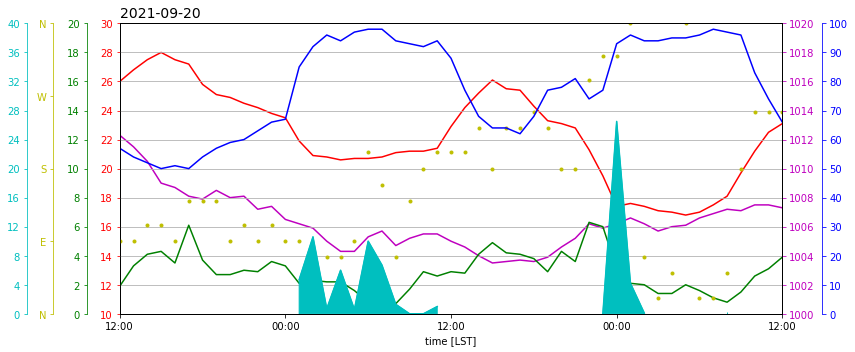

In [7]:
dt = pd.read_csv(r'C:\Users\DongGyu_Hyeon\Downloads\OBS_ASOS_TIM_20211008093523.csv',encoding='cp949',
                 usecols=[2,3,5,7,9,11,17],
                 names=['datetime','T2m','rainfall','Wind_speed','Wind_dir','RH','SLP'],skiprows=1)
p = dt['SLP']
t = dt['T2m']
ws = dt['Wind_speed']
wd = dt['Wind_dir']
rh = dt['RH']
prcp = dt['rainfall']
time = dt['datetime']
plot_asos(time,p,t,ws,wd,rh,prcp)

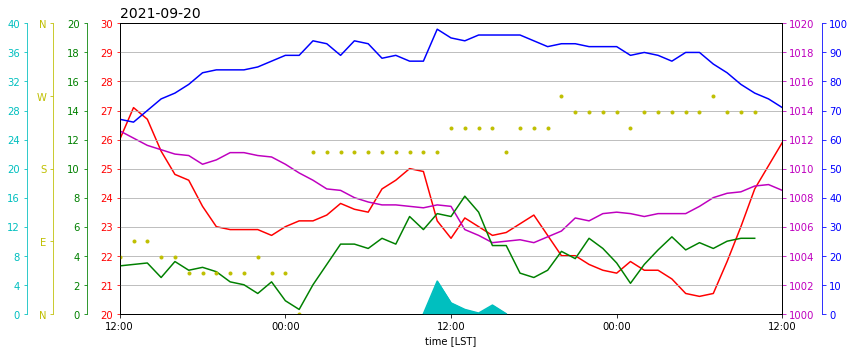

In [9]:
dt = pd.read_csv(r'C:\Users\DongGyu_Hyeon\Downloads\OBS_ASOS_TIM_20211008094428.csv',encoding='cp949',
                 usecols=[2,3,5,7,9,11,17],
                 names=['datetime','T2m','rainfall','Wind_speed','Wind_dir','RH','SLP'],skiprows=1)
p = dt['SLP']
t = dt['T2m']
ws = dt['Wind_speed']
wd = dt['Wind_dir']
rh = dt['RH']
prcp = dt['rainfall']
time = dt['datetime']
plot_asos(time,p,t,ws,wd,rh,prcp)
